# Project 1 - App Rating Prediction

## Step 1 : Load the data file using pandas.

##### Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
with zipfile.ZipFile('1569582940_googleplaystore.zip','r') as zip_ref:
    zip_ref.extractall('Project 1 - App Rating Prediction')

In [3]:
gdata = pd.read_csv("Project 1 - App Rating Prediction/googleplaystore.csv")
gdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Step 2 : Check for null values in the data. Get the number of null values for each column.

In [4]:
gdata.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Step 3 : Drop records with nulls in any of the columns.

In [5]:
gdata1 = gdata.dropna()
gdata1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
gdata1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
gdata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


## Step 4 : Variables seem to have incorrect type and inconsistent formatting. You need to fix them:

### Step 4 Substep 1 : Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

#### Step 4 Substep 1 Part 1: Extract the numeric value from the column

In [8]:
gdata1['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [9]:
gdata1['Size_1'] = gdata1.Size.replace(['Varies with device'],[''])
gdata1['Size_1'].head()

<ipython-input-9-56d83f83fa4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['Size_1'] = gdata1.Size.replace(['Varies with device'],[''])


0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size_1, dtype: object

In [10]:
gdata1['Size_2'] = gdata1.Size_1.replace(r'[KM]+$', '', regex=True)
gdata1['Size_2'].head()

<ipython-input-10-1d243f58ff1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['Size_2'] = gdata1.Size_1.replace(r'[KM]+$', '', regex=True)


0     19
1     14
2    8.7
3     25
4    2.8
Name: Size_2, dtype: object

### Step 4 Substep 1 Part 2: Multiply the value by 1,000, if size is mentioned in Mb

In [11]:
gdata1['Size_3'] = gdata1.Size_1.str.extract(r'[\d\.]+([KM]+)', expand=False).replace(['M'], [10**3])
gdata1['Size_3'].head()

<ipython-input-11-fe5639da0229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['Size_3'] = gdata1.Size_1.str.extract(r'[\d\.]+([KM]+)', expand=False).replace(['M'], [10**3])


0    1000.0
1    1000.0
2    1000.0
3    1000.0
4    1000.0
Name: Size_3, dtype: float64

In [12]:
gdata1['Size_4'] = gdata1['Size'].astype(str).str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float)
gdata1['Size_4'].head()

<ipython-input-12-c0bfb0ff662f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['Size_4'] = gdata1['Size'].astype(str).str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float)


0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size_4, dtype: float64

In [13]:
gdata1['Size_5'] = gdata1['Size_4']*gdata1['Size_3']
gdata1['Size_5'].head()

<ipython-input-13-78d8026e72e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['Size_5'] = gdata1['Size_4']*gdata1['Size_3']


0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
Name: Size_5, dtype: float64

In [14]:
gdata1['Size_5'].isnull().sum()

1894

In [15]:
gdata1['Size_5'] = gdata1['Size_5'].fillna(np.mean(gdata1['Size_5']))

<ipython-input-15-b01939123037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['Size_5'] = gdata1['Size_5'].fillna(np.mean(gdata1['Size_5']))


In [16]:
gdata1['Size_5'].isnull().sum()

0

### Step 4 Substep 2 : Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [17]:
gdata1['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [18]:
gdata1['Reviews_1'] = gdata1['Reviews'].astype(int)
gdata1['Reviews_1'].head()

<ipython-input-18-eaa80f916e2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['Reviews_1'] = gdata1['Reviews'].astype(int)


0       159
1       967
2     87510
3    215644
4       967
Name: Reviews_1, dtype: int32

### Step 4 Substep 3 : Installs field is currently stored as string and has values like 1,000,000+.

#### Step 4 Substep 3 Part 1 : Treat 1,000,000+ as 1,000,000

In [19]:
gdata1['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

#### Step 4 Substep 3 Part 2 : remove ‘+’, ‘,’ from the field, convert it to integer

In [20]:
gdata1.Installs.dtype

dtype('O')

In [21]:
gdata1['Installs_1'] = gdata1['Installs'].replace({'[,+]':''},regex=True)

<ipython-input-21-0362b8a8424a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['Installs_1'] = gdata1['Installs'].replace({'[,+]':''},regex=True)


In [22]:
gdata1['Installs_1'] = gdata1['Installs_1'].astype(int)
gdata1['Installs_1'].head()

<ipython-input-22-c2247b7bc345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['Installs_1'] = gdata1['Installs_1'].astype(int)


0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs_1, dtype: int32

#### Step 4 Substep 4 : Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [23]:
gdata1['Price'][220:224]

232        0
233        0
234    $4.99
235    $4.99
Name: Price, dtype: object

In [24]:
type(gdata1['Price'])

pandas.core.series.Series

In [25]:
gdata1['Price_1'] = gdata1['Price'].astype(str).str.extract("([-+]?\d*\.\d+|[-+]?\d+)$").astype(float)
gdata1['Price_1'][220:224]

<ipython-input-25-88b29b379534>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['Price_1'] = gdata1['Price'].astype(str).str.extract("([-+]?\d*\.\d+|[-+]?\d+)$").astype(float)


232    0.00
233    0.00
234    4.99
235    4.99
Name: Price_1, dtype: float64

### Step 4 Substep 5 : Sanity checks:

#### Step 4 Substep 5 Part 1 : Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [26]:
max(gdata1['Rating'])

5.0

In [27]:
min(gdata1['Rating'])

1.0

#### Step 4 Substep 5 Part 2 : Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [28]:
gdata1['Reviews_1'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews_1, dtype: int32

In [29]:
gdata1['Installs_1'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs_1, dtype: int32

In [30]:
gdata1['rgti'] = gdata1['Reviews_1']>gdata1['Installs_1']
gdata1['rgti'].head()

<ipython-input-30-90b759d6361b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata1['rgti'] = gdata1['Reviews_1']>gdata1['Installs_1']


0    False
1    False
2    False
3    False
4    False
Name: rgti, dtype: bool

In [31]:
gdata1.rgti[gdata1.rgti].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [32]:
gdata1.loc[6700]

App               Brick Breaker BR
Category                      GAME
Rating                         5.0
Reviews                          7
Size                           19M
Installs                        5+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                      Arcade
Last Updated         July 23, 2018
Current Ver                    1.0
Android Ver             4.1 and up
Size_1                         19M
Size_2                          19
Size_3                      1000.0
Size_4                        19.0
Size_5                     19000.0
Reviews_1                        7
Installs_1                       5
Price_1                        0.0
rgti                          True
Name: 6700, dtype: object

In [33]:
gdata2 = gdata1.drop([2454, 4663, 5917, 6700, 7402, 8591, 10697])
gdata2.rgti[gdata2.rgti].index

Int64Index([], dtype='int64')

#### Step 4 Substep 5 Part 3 : For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [34]:
gdata3 = gdata2[gdata2['Type'] == 'Free']

In [35]:
gdata3['Price_1'] = gdata3['Price'].astype(int)

<ipython-input-35-a88d5396de22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata3['Price_1'] = gdata3['Price'].astype(int)


In [36]:
gdata3['FPrice'] = gdata3['Price_1'] > 0
gdata3.FPrice[gdata3.FPrice].index

<ipython-input-36-98ce50919975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdata3['FPrice'] = gdata3['Price_1'] > 0


Int64Index([], dtype='int64')

There are no rows where the price is more than 0 for free apps

## Step 5 : Performing univariate analysis:

### Step 5 Check 1 : Boxplot for Price

In [37]:
sns.set(style="whitegrid")

<AxesSubplot:xlabel='Price_1'>

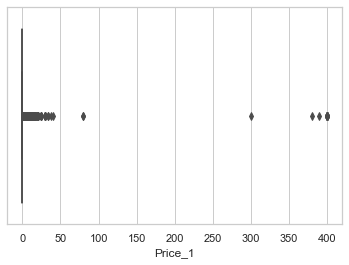

In [38]:
sns.boxplot(x=gdata2["Price_1"])

### Step 5 Check 2 : Are there any outliers? Think about the price of usual apps on Play Store.

### Step 5 Check 3 : Boxplot for Reviews

<AxesSubplot:xlabel='Reviews_1'>

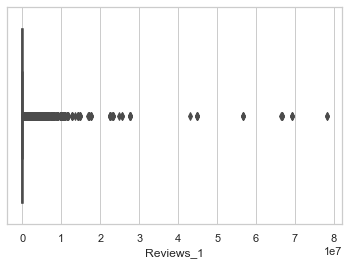

In [39]:
sns.boxplot(x=gdata2["Reviews_1"])

### Step 5 Check 4 : Are there any apps with very high number of reviews? Do the values seem right?

In [40]:
max(gdata2.Reviews_1)

78158306

In [41]:
gdata2[['Reviews_1']].idxmax()

Reviews_1    2544
dtype: int64

In [42]:
gdata2.loc[2544]

App                         Facebook
Category                      SOCIAL
Rating                           4.1
Reviews                     78158306
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated          August 3, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Size_1                              
Size_2                              
Size_3                           NaN
Size_4                           NaN
Size_5                  23746.316635
Reviews_1                   78158306
Installs_1                1000000000
Price_1                          0.0
rgti                           False
Name: 2544, dtype: object

The highest reviews seem to be of Facebook app, which is widely used across all age groups and domains, so they seem to be right.

### Step 5 Check 5 : Histogram for Rating

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

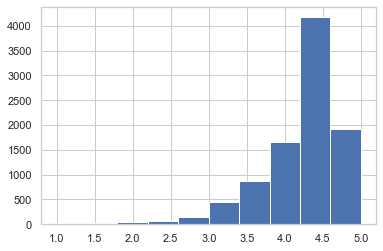

In [43]:
plt.hist(gdata2['Rating'])

### Step 5 Check 6 : How are the ratings distributed? Is it more toward higher ratings?

Ratings are more toward higher ratingss, but peak at 4.5

### Step 5 Check 7 : Histogram for Size

(array([2988., 1398., 2884.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([  1000.,  10900.,  20800.,  30700.,  40600.,  50500.,  60400.,
         70300.,  80200.,  90100., 100000.]),
 <BarContainer object of 10 artists>)

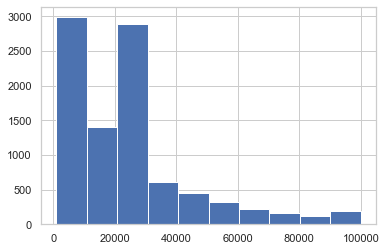

In [44]:
plt.hist(gdata2['Size_5'])

## Step 6 : Outlier treatment:

### Step 6 Substep 1 : 1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

#### Step 6 Substep 1 Part 1 : Check out the records with very high price. Is 200 indeed a high price?

#### Step 6 Substep 1 Part 2 : Drop these as most seem to be junk apps

In [45]:
max(gdata2['Price_1'])

400.0

In [46]:
gdata3 = gdata2[gdata2['Price_1'] <= 200.00 ]

In [47]:
max(gdata3['Price_1'])

79.99

### Step 6 Substep 2 : Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [48]:
max(gdata3['Reviews_1'])

78158306

In [49]:
gdata4 = gdata3[gdata3['Reviews_1'] < 2000000]

In [50]:
max(gdata4['Reviews_1'])

1986068

### Step 6 Substep 3 : Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

#### Step 6 Substep 3 Part 1 : Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [51]:
print("10th Percentile\n", np.percentile(gdata4['Installs_1'],q=10))

10th Percentile
 1000.0


In [52]:
print("25th Percentile\n", np.percentile(gdata4['Installs_1'],q=25))

25th Percentile
 10000.0


In [53]:
print("50th Percentile\n", np.percentile(gdata4['Installs_1'],q=50))

50th Percentile
 500000.0


In [54]:
print("70th Percentile\n", np.percentile(gdata4['Installs_1'],q=70))

70th Percentile
 1000000.0


In [55]:
print("90th Percentile\n", np.percentile(gdata4['Installs_1'],q=90))

90th Percentile
 10000000.0


In [56]:
print("95th Percentile\n", np.percentile(gdata4['Installs_1'],q=95))

95th Percentile
 10000000.0


In [57]:
print("99th Percentile\n", np.percentile(gdata4['Installs_1'],q=99))

99th Percentile
 100000000.0


#### Step 6 Substep 3 Part 2 : Decide a threshold as cutoff for outlier and drop records having values more than that

In [58]:
max(gdata4['Installs_1'])

1000000000

In [59]:
gdata5 = gdata4[gdata4['Installs_1'] <= 1000000] #70th percentile

In [60]:
max(gdata5['Installs_1'])

1000000

## Step 7 : Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

### Step 7 Check 1 : Make scatter plot/joinplot for Rating vs. Price. What pattern do you observe? Does rating increase with price?

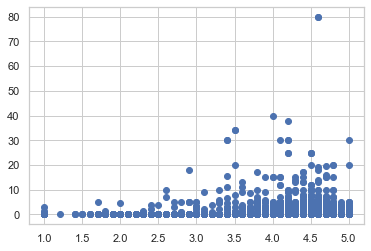

In [61]:
plt.scatter(x = gdata5['Rating'],y = gdata5['Price_1'])

From the aabove scatter plot, ratings seem to increase with price.

### Step 7 Check 2 : Make scatter plot/joinplot for Rating vs. Size. Are heavier apps rated better?

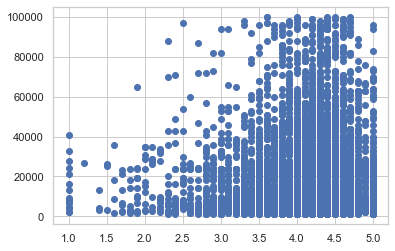

In [62]:
plt.scatter(x = gdata5['Rating'],y = gdata5['Size_5'])

Heavier apps seem to have a higher rating than lighter apps, but there are some lighter apps which have higher rating.

### Step 7 Check 3 : Make scatter plot/joinplot for Rating vs. Reviews. Does more review mean a better rating always?

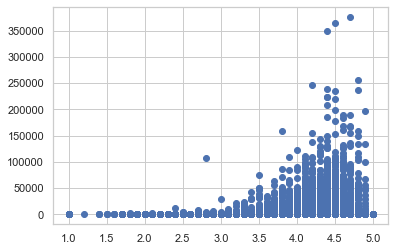

In [63]:
plt.scatter(x = gdata5['Rating'],y = gdata5['Reviews_1'])

From the scatter plot above it would appear that more reviews seem to be getting a better rating than lesser rated apps.

### Step 7 Check 4 : Make boxplot for Rating vs. Content Rating. Is there any difference in the ratings? Are some types liked better?

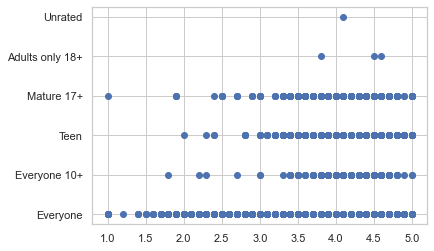

In [64]:
plt.scatter(x = gdata5['Rating'],y = gdata5['Content Rating'])

Content ratings of Mature 17+ seems to enjoy popularity across all rating classes, after Everyone.

### Step 7 Check 5 : Make boxplot for Ratings vs. Category. Which genre has the best ratings?

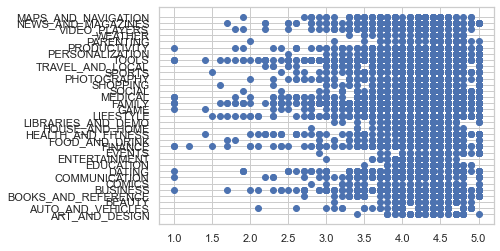

In [65]:
plt.scatter(x = gdata5['Rating'],y = gdata5['Category'])

According to the scatter plot, Tools and Lifestyle seems to have the best ratings, as in each rating class is populated.

## Step 8 : Data preprocessing : For the steps below, create a copy of the dataframe to make all the edits. Name it inp1. 

In [66]:
inp1 = gdata5.copy()
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,Size_1,Size_2,Size_3,Size_4,Size_5,Reviews_1,Installs_1,Price_1,rgti
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,19M,19,1000.0,19.0,19000.0,159,10000,0.0,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,14M,14,1000.0,14.0,14000.0,967,500000,0.0,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,4.4 and up,2.8M,2.8,1000.0,2.8,2800.0,967,100000,0.0,False
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,...,2.3 and up,5.6M,5.6,1000.0,5.6,5600.0,167,50000,0.0,False
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,19M,19,1000.0,19.0,19000.0,178,50000,0.0,False


### Step 8 Substep 1 : Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [67]:
inp1['Reviews_2'] = np.log1p(inp1['Reviews_1'])
inp1['Reviews_2'].head()

0    5.075174
1    6.875232
4    6.875232
5    5.123964
6    5.187386
Name: Reviews_2, dtype: float64

In [68]:
inp1['Installs_2'] = np.log1p(inp1['Installs_1'])
inp1['Installs_2'].head()

0     9.210440
1    13.122365
4    11.512935
5    10.819798
6    10.819798
Name: Installs_2, dtype: float64

In [69]:
inp1['Size_5'] = np.log1p(inp1['Size_5'])
inp1['Size_5'].head()

0    9.852247
1    9.546884
4    7.937732
5    8.630700
6    9.852247
Name: Size_5, dtype: float64

### Step 8 Substep 2 : Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [70]:
inp1.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Size_2,Size_3,Size_4,Size_5,Reviews_1,Installs_1,Price_1,rgti,Reviews_2,Installs_2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,19,1000.0,19.0,9.852247,159,10000,0.0,False,5.075174,9.21044


In [71]:
inp2 = inp1.drop(columns = ['App','Type','Last Updated','Current Ver','Android Ver','Size','Size_1','Size_2','Size_3','Size_4','Reviews','Installs','Price','Reviews_1','Installs_1','rgti'])
inp2.head(1)

,Category,Rating,Content Rating,Genres,Size_5,Price_1,Reviews_2,Installs_2
0,ART_AND_DESIGN,4.1,Everyone,Art & Design,9.852247,0.0,5.075174,9.21044


In [72]:
inp3 = inp2.rename(columns={'Size_5':'Size','Price_1':'Price','Reviews_2':'Reviews','Installs_2':'Installs'})

In [73]:
inp1 = inp3[['Rating','Category','Reviews','Size','Installs','Price','Content Rating','Genres']]
inp1.head(1)

,Rating,Category,Reviews,Size,Installs,Price,Content Rating,Genres
0,4.1,ART_AND_DESIGN,5.075174,9.852247,9.21044,0.0,Everyone,Art & Design


In [74]:
inp1.isnull().sum()

Rating            0
Category          0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [75]:
inp1.dtypes

Rating            float64
Category           object
Reviews           float64
Size              float64
Installs          float64
Price             float64
Content Rating     object
Genres             object
dtype: object

In [76]:
inp1.replace([np.inf, -np.inf], np.nan, inplace=True)
inp1.fillna(1, inplace=True)                              #to avoid error while sklearn linearregression 'Input contains NaN, infinity or a value too large for dtype('float64').'

### Step 8 Substep 3 : Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [77]:
inp1.head(1)

,Rating,Category,Reviews,Size,Installs,Price,Content Rating,Genres
0,4.1,ART_AND_DESIGN,5.075174,9.852247,9.21044,0.0,Everyone,Art & Design


In [78]:
inp1['Category'].value_counts()

FAMILY                 1366
TOOLS                   545
GAME                    522
MEDICAL                 346
FINANCE                 269
LIFESTYLE               265
BUSINESS                252
PERSONALIZATION         233
PRODUCTIVITY            213
HEALTH_AND_FITNESS      209
SPORTS                  198
NEWS_AND_MAGAZINES      175
DATING                  169
COMMUNICATION           161
PHOTOGRAPHY             145
SOCIAL                  137
BOOKS_AND_REFERENCE     137
TRAVEL_AND_LOCAL        136
SHOPPING                122
EDUCATION                99
VIDEO_PLAYERS            98
MAPS_AND_NAVIGATION      90
FOOD_AND_DRINK           79
AUTO_AND_VEHICLES        68
ENTERTAINMENT            68
HOUSE_AND_HOME           60
LIBRARIES_AND_DEMO       58
COMICS                   52
ART_AND_DESIGN           52
WEATHER                  51
PARENTING                48
EVENTS                   43
BEAUTY                   40
Name: Category, dtype: int64

In [79]:
categories_to_combine = ['BOOKS_AND_REFERENCE','LIBRARIES_AND_DEMO','NEWS_AND_MAGAZINES','EDUCATION','COMICS']
for cat in categories_to_combine:
 inp1['Category'].replace({cat:'BOOKS_AND_EDUCATION'},inplace = True)

In [80]:
categories_to_combine = ['MEDICAL','LIFESTYLE','HEALTH_AND_FITNESS','SPORTS','BEAUTY']
for cat1 in categories_to_combine:
 inp1['Category'].replace({cat1:'HEALTH_AND_FITNESS'},inplace = True)

In [81]:
categories_to_combine = ['DATING','SOCIAL','EVENTS','COMMUNICATION','FAMILY','PARENTING']
for cat2 in categories_to_combine:
 inp1['Category'].replace({cat2:'SOCIAL'},inplace = True)

In [82]:
categories_to_combine = ['GAME','VIDEO_PLAYERS','ENTERTAINMENT']
for cat3 in categories_to_combine:
 inp1['Category'].replace({cat3:'ENTERTAINMENT'},inplace = True)

In [83]:
categories_to_combine = ['BUSINESS','FINANCE','PRODUCTIVITY']
for cat4 in categories_to_combine:
 inp1['Category'].replace({cat4:'BUSINESS'},inplace = True)

In [84]:
categories_to_combine = ['MAPS_AND_NAVIGATION','TRAVEL_AND_LOCAL','FOOD_AND_DRINK','SHOPPING']
for cat5 in categories_to_combine:
 inp1['Category'].replace({cat5:'MAPS_AND_NAVIGATION'},inplace = True)

In [85]:
categories_to_combine = ['PHOTOGRAPHY','ART_AND_DESIGN','HOUSE_AND_HOME','AUTO_AND_VEHICLES']
for cat6 in categories_to_combine:
 inp1['Category'].replace({cat6:'HOBBIES'},inplace = True)

In [86]:
inp1['Category'].value_counts()

SOCIAL                 1924
HEALTH_AND_FITNESS     1058
BUSINESS                734
ENTERTAINMENT           688
TOOLS                   545
BOOKS_AND_EDUCATION     521
MAPS_AND_NAVIGATION     427
HOBBIES                 325
PERSONALIZATION         233
WEATHER                  51
Name: Category, dtype: int64

In [87]:
inp1['Genres'].value_counts()

Tools                                  545
Education                              418
Entertainment                          405
Medical                                346
Finance                                269
                                      ... 
Comics;Creativity                        1
Arcade;Pretend Play                      1
Card;Action & Adventure                  1
Health & Fitness;Action & Adventure      1
Entertainment;Pretend Play               1
Name: Genres, Length: 108, dtype: int64

In [88]:
categories_to_combine = ['Books & Reference','Books & Reference;Creativity','Books & Reference;Education','Libraries & Demo','News & Magazines','Education;Education','Education','Education;Creativity','Education;Music & Video','Education;Action & Adventure','Education;Pretend Play','Education;Brain Games','Simulation;Education','Educational;Creativity','Educational;Education','Educational;Brain Games','Educational;Pretend Play','Entertainment;Education','Casual;Education','Educational;Action & Adventure','Health & Fitness;Education','Adventure;Education','Tools;Education','Parenting;Education','Educational','Trivia;Education','Lifestyle;Education','Books & Reference;Education','Puzzle;Education','Role Playing;Education','Strategy;Education','Comics','Comics;Creativity']
for cat in categories_to_combine:
 inp1['Genres'].replace({cat:'Books & Education'},inplace = True)

In [89]:
categories_to_combine = ['Medical','Lifestyle;Pretend Play','Health & Fitness','Health & Fitness;Action & Adventure','Sports','Sports;Action & Adventure','Beauty']
for cat1 in categories_to_combine:
 inp1['Genres'].replace({cat1:'Health & Fitness'},inplace = True)

In [90]:
categories_to_combine = ['Dating','Social','Events','Communication','Communication;Creativity','Parenting','Parenting;Music & Video','Parenting;Brain Games']
for cat2 in categories_to_combine:
 inp1['Genres'].replace({cat2:'Social'},inplace = True)

In [91]:
categories_to_combine = ['Action','Simulation','Casual','Arcade','Role Playing','Puzzle','Adventure','Strategy','Racing','Card','Board','Word','Casino','Trivia','Entertainment;Brain Games','Casual;Brain Games','Puzzle;Brain Games','Casual;Pretend Play','Card;Brain Games','Board;Brain Games','Adventure;Brain Games','Role Playing;Brain Games','Arcade;Action & Adventure','Racing;Action & Adventure','Action;Action & Adventure','Casual;Action & Adventure','Simulation;Pretend Play','Simulation;Action & Adventure','Role Playing;Pretend Play','Adventure;Action & Adventure','Arcade;Action & Adventure','Racing;Action & Adventure','Action;Action & Adventure','Casual;Action & Adventure','Simulation;Pretend Play','Simulation;Action & Adventure','Role Playing;Pretend Play','Adventure;Action & Adventure','Role Playing;Action & Adventure','Puzzle;Creativity','Strategy;Action & Adventure','Board;Action & Adventure','Casual;Creativity','Board;Pretend Play','Racing;Pretend Play','Arcade;Pretend Play','Card;Action & Adventure','Strategy;Creativity','Puzzle;Action & Adventure','Video Players & Editors;Creativity','Video Players & Editors','Video Players & Editors;Music & Video','Entertainment','Entertainment;Music & Video','Entertainment;Creativity','Entertainment;Action & Adventure','Entertainment;Pretend Play','Music;Music & Video','Music & Audio;Music & Video','Music']
for cat3 in categories_to_combine:
 inp1['Genres'].replace({cat3:'Entertainment'},inplace = True)

In [92]:
categories_to_combine = ['Business','Finance','Productivity']
for cat4 in categories_to_combine:
 inp1['Genres'].replace({cat4:'Business'},inplace = True)

In [93]:
categories_to_combine = ['Maps & Navigation','Travel & Local','Travel & Local;Action & Adventure','Food & Drink','Shopping']
for cat5 in categories_to_combine:
 inp1['Genres'].replace({cat5:'Maps & Navigation'},inplace = True)

In [94]:
categories_to_combine = ['Photography','Art & Design','Art & Design;Pretend Play','Art & Design;Creativity','Art & Design;Action & Adventure','House & Home','Auto & Vehicles']
for cat6 in categories_to_combine:
 inp1['Genres'].replace({cat6:'Hobbies'},inplace = True)

In [95]:
inp1['Genres'].value_counts()

Entertainment        1564
Books & Education    1005
Health & Fitness      798
Business              734
Social                556
Tools                 545
Maps & Navigation     427
Hobbies               328
Lifestyle             265
Personalization       233
Weather                51
Name: Genres, dtype: int64

In [96]:
inp1['Content Rating'].value_counts()

Everyone           5350
Teen                625
Mature 17+          314
Everyone 10+        213
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [97]:
inp2 = pd.get_dummies(data=inp1,columns=['Category','Genres','Content Rating'])
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_BOOKS_AND_EDUCATION,Category_BUSINESS,Category_ENTERTAINMENT,Category_HEALTH_AND_FITNESS,Category_HOBBIES,...,Genres_Personalization,Genres_Social,Genres_Tools,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,9.852247,9.210440,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,9.546884,13.122365,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,7.937732,11.512935,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,8.630700,10.819798,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,9.852247,10.819798,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Step 9 : Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [98]:
inp2.head(1)

,Rating,Reviews,Size,Installs,Price,Category_BOOKS_AND_EDUCATION,Category_BUSINESS,Category_ENTERTAINMENT,Category_HEALTH_AND_FITNESS,Category_HOBBIES,...,Genres_Personalization,Genres_Social,Genres_Tools,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,9.852247,9.21044,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [99]:
df_train = inp2
df_train.head()

,Rating,Reviews,Size,Installs,Price,Category_BOOKS_AND_EDUCATION,Category_BUSINESS,Category_ENTERTAINMENT,Category_HEALTH_AND_FITNESS,Category_HOBBIES,...,Genres_Personalization,Genres_Social,Genres_Tools,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,9.852247,9.210440,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,9.546884,13.122365,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,7.937732,11.512935,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,8.630700,10.819798,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,9.852247,10.819798,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [100]:
df_test = inp2.drop(['Rating'],axis=1)
df_test.head()

,Reviews,Size,Installs,Price,Category_BOOKS_AND_EDUCATION,Category_BUSINESS,Category_ENTERTAINMENT,Category_HEALTH_AND_FITNESS,Category_HOBBIES,Category_MAPS_AND_NAVIGATION,...,Genres_Personalization,Genres_Social,Genres_Tools,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.075174,9.852247,9.210440,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6.875232,9.546884,13.122365,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,6.875232,7.937732,11.512935,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,5.123964,8.630700,10.819798,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,5.187386,9.852247,10.819798,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Step 10 : Separate the dataframes into X_train, y_train, X_test, and y_test.

In [101]:
x = df_train.drop(columns = ['Rating'])
x.head()

,Reviews,Size,Installs,Price,Category_BOOKS_AND_EDUCATION,Category_BUSINESS,Category_ENTERTAINMENT,Category_HEALTH_AND_FITNESS,Category_HOBBIES,Category_MAPS_AND_NAVIGATION,...,Genres_Personalization,Genres_Social,Genres_Tools,Genres_Weather,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.075174,9.852247,9.210440,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6.875232,9.546884,13.122365,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,6.875232,7.937732,11.512935,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,5.123964,8.630700,10.819798,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,5.187386,9.852247,10.819798,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [102]:
y = df_train['Rating']
y.head()

0    4.1
1    3.9
4    4.3
5    4.4
6    3.8
Name: Rating, dtype: float64

In [103]:
x.shape

(6506, 31)

In [104]:
y.shape

(6506,)

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4554, 31)
(1952, 31)
(4554,)
(1952,)


## Step 11 : Model building :

### Step 11 Substep 1 : Use linear regression as the technique

In [106]:
model = LinearRegression(n_jobs=-1)
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [107]:
print(model.intercept_)
print(model.coef_)

4.788336421585006
[ 0.17351697 -0.01861844 -0.15656045 -0.00711199 -0.01917038 -0.01862594
  0.00928445  0.13347704 -0.17510211 -0.01451077  0.07498708  0.04044487
 -0.05576174  0.0249775   0.1047881  -0.01862594 -0.07126721 -0.03969325
  0.17814967 -0.15563837 -0.01451077  0.07498708 -0.02740508 -0.05576174
  0.0249775  -0.09375881  0.03234164 -0.00979026 -0.02371323  0.04296383
  0.05195683]


In [108]:
print(df_train.columns.values.tolist())

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Category_BOOKS_AND_EDUCATION', 'Category_BUSINESS', 'Category_ENTERTAINMENT', 'Category_HEALTH_AND_FITNESS', 'Category_HOBBIES', 'Category_MAPS_AND_NAVIGATION', 'Category_PERSONALIZATION', 'Category_SOCIAL', 'Category_TOOLS', 'Category_WEATHER', 'Genres_Books & Education', 'Genres_Business', 'Genres_Entertainment', 'Genres_Health & Fitness', 'Genres_Hobbies', 'Genres_Lifestyle', 'Genres_Maps & Navigation', 'Genres_Personalization', 'Genres_Social', 'Genres_Tools', 'Genres_Weather', 'Content Rating_Adults only 18+', 'Content Rating_Everyone', 'Content Rating_Everyone 10+', 'Content Rating_Mature 17+', 'Content Rating_Teen', 'Content Rating_Unrated']


In [109]:
list(zip(df_train.columns,model.coef_))

[('Rating', 0.1735169723862383),
 ('Reviews', -0.01861844237407065),
 ('Size', -0.15656045074630592),
 ('Installs', -0.00711199223571913),
 ('Price', -0.01917038447568863),
 ('Category_BOOKS_AND_EDUCATION', -0.01862594426687794),
 ('Category_BUSINESS', 0.009284451604858968),
 ('Category_ENTERTAINMENT', 0.13347703507030242),
 ('Category_HEALTH_AND_FITNESS', -0.17510210863178274),
 ('Category_HOBBIES', -0.014510768824954),
 ('Category_MAPS_AND_NAVIGATION', 0.07498707849065384),
 ('Category_PERSONALIZATION', 0.04044487398888735),
 ('Category_SOCIAL', -0.05576173553818265),
 ('Category_TOOLS', 0.024977502582783737),
 ('Category_WEATHER', 0.104788099992335),
 ('Genres_Books & Education', -0.0186259442668785),
 ('Genres_Business', -0.07126720527414562),
 ('Genres_Entertainment', -0.03969324538529741),
 ('Genres_Health & Fitness', 0.17814966536062926),
 ('Genres_Hobbies', -0.15563836587442628),
 ('Genres_Lifestyle', -0.014510768824953932),
 ('Genres_Maps & Navigation', 0.07498707849065381),
 

In [110]:
predictors = df_train.columns.drop(['Rating'])
predictors

Index(['Reviews', 'Size', 'Installs', 'Price', 'Category_BOOKS_AND_EDUCATION',
       'Category_BUSINESS', 'Category_ENTERTAINMENT',
       'Category_HEALTH_AND_FITNESS', 'Category_HOBBIES',
       'Category_MAPS_AND_NAVIGATION', 'Category_PERSONALIZATION',
       'Category_SOCIAL', 'Category_TOOLS', 'Category_WEATHER',
       'Genres_Books & Education', 'Genres_Business', 'Genres_Entertainment',
       'Genres_Health & Fitness', 'Genres_Hobbies', 'Genres_Lifestyle',
       'Genres_Maps & Navigation', 'Genres_Personalization', 'Genres_Social',
       'Genres_Tools', 'Genres_Weather', 'Content Rating_Adults only 18+',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated'],
      dtype='object')

In [111]:
coef = pd.Series(model.coef_,predictors).sort_values()
coef

Category_HOBBIES                 -0.175102
Installs                         -0.156560
Genres_Lifestyle                 -0.155638
Content Rating_Adults only 18+   -0.093759
Genres_Entertainment             -0.071267
Category_TOOLS                   -0.055762
Genres_Tools                     -0.055762
Genres_Health & Fitness          -0.039693
Genres_Social                    -0.027405
Content Rating_Mature 17+        -0.023713
Category_BOOKS_AND_EDUCATION     -0.019170
Genres_Business                  -0.018626
Category_BUSINESS                -0.018626
Size                             -0.018618
Category_MAPS_AND_NAVIGATION     -0.014511
Genres_Maps & Navigation         -0.014511
Content Rating_Everyone 10+      -0.009790
Price                            -0.007112
Category_ENTERTAINMENT            0.009284
Category_WEATHER                  0.024978
Genres_Weather                    0.024978
Content Rating_Everyone           0.032342
Category_SOCIAL                   0.040445
Content Rat

<AxesSubplot:title={'center':'Modal Coefficients'}>

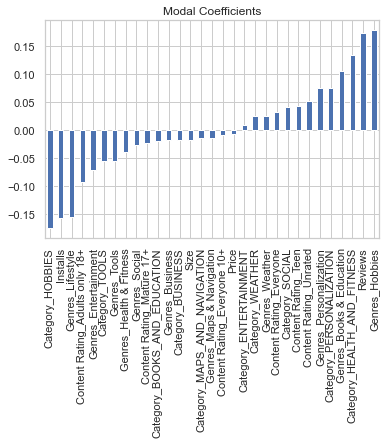

In [112]:
coef.plot(kind='bar',title = 'Modal Coefficients')

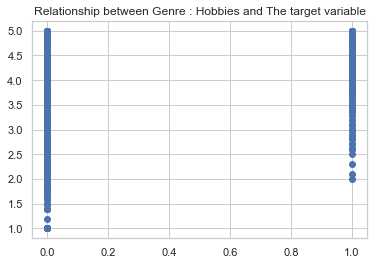

In [113]:
plt.scatter(df_train['Genres_Hobbies'],df_train['Rating'])
plt.title("Relationship between Genre : Hobbies and The target variable")
plt.show()

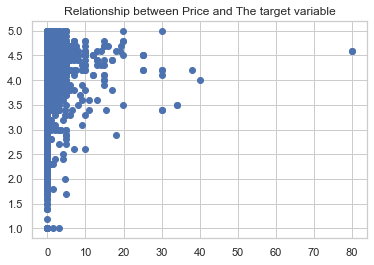

In [114]:
plt.scatter(df_train['Price'],df_train['Rating'])
plt.title("Relationship between Price and The target variable")
plt.show()

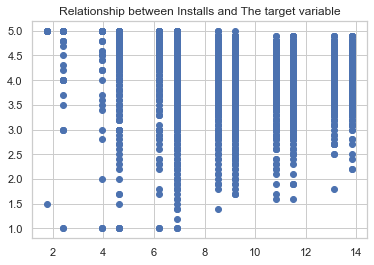

In [115]:
plt.scatter(df_train['Installs'],df_train['Rating'])
plt.title("Relationship between Installs and The target variable")
plt.show()

### Step 11 Substep 2 : Report the R2 on the train set

In [116]:
print('R2 value/Coefficient of Determination: {}'.format(model.score(x_test,y_test)))

R2 value/Coefficient of Determination: 0.11219554253256137


## Step 12 : Make predictions on test set and report R2.

In [117]:
model.predict(x_test)

array([3.99011236, 4.00886209, 4.04349464, ..., 4.14120839, 4.35567195,
       4.28395777])

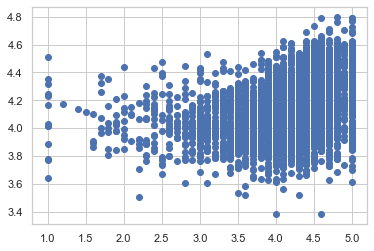

In [118]:
plt.scatter(y_train,model.predict(x_train))

In [119]:
print(sqrt(mean_squared_error(y_train,model.predict(x_train))))

0.5516429000985769


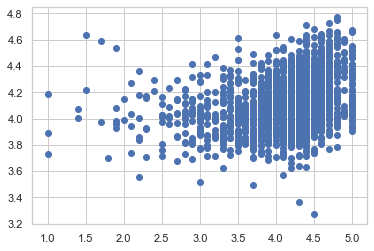

In [120]:
plt.scatter(y_test,model.predict(x_test))

In [121]:
print(sqrt(mean_squared_error(y_test,model.predict(x_test))))

0.5397894824642907


The error in x_test prediction (0.5397) is lesser than x_train prediction (0.5516) but marginally. Hence the model is acceptable, with a slight chance of overfitting.

In [122]:
pd.DataFrame({'Actual':y_test,'Predicted':model.predict(x_test)}).head(10)

,Actual,Predicted
6106,4.2,3.990112
8422,2.5,4.008862
8238,4.8,4.043495
6175,4.5,4.344791
110,4.3,4.027738
6050,4.4,4.214510
7413,2.4,4.211288
9356,4.6,4.147439
10318,4.4,4.139231
5568,4.2,3.845298


# ---X---